source: https://ourcodingclub.github.io/2017/03/15/mixed-models.html , https://github.com/ourcodingclub/CC-Linear-mixed-models

In [6]:
######################################
#                                    #
#   Mixed effects modeling in R     #
#                                    #
######################################

## authors: Gabriela K Hajduk, based on workshop developed by Liam Bailey
## contact details: gkhajduk.github.io; email: gkhajduk@gmail.com
## date: 2017-03-09
##
require(dplyr)
library(lme4)

In [11]:

# We have given various dragons in different mountain ranges at different sites an intelligence test.
# We've noted their test scores, body length, and the location where the dragons live.

#HERE IS OUR RESEARCH QUESTION: 

###########################################

# Is there an association between body length and intelligence in dragons?

###########################################

###---- Explore the data -----###

## load the data and have a look at it

load("dragons.RData")
str(dragons)

'data.frame':	480 obs. of  5 variables:
 $ testScore    : num  16.15 33.89 6.04 18.84 33.86 ...
 $ bodyLength   : num  166 168 166 168 170 ...
 $ mountainRange: Factor w/ 8 levels "Bavarian","Central",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ X            : logi  NA NA NA NA NA NA ...
 $ site         : Factor w/ 3 levels "a","b","c": 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
dragons

testScore,bodyLength,mountainRange,X,site
<dbl>,<dbl>,<fct>,<lgl>,<fct>
16.147309,165.5485,Bavarian,NA,a
33.886183,167.5593,Bavarian,NA,a
6.038333,165.8830,Bavarian,NA,a
18.838821,167.6855,Bavarian,NA,a
33.862328,169.9597,Bavarian,NA,a
47.043246,168.6887,Bavarian,NA,a
2.557890,169.6194,Bavarian,NA,a
3.875730,164.4163,Bavarian,NA,a
3.597530,167.5104,Bavarian,NA,a


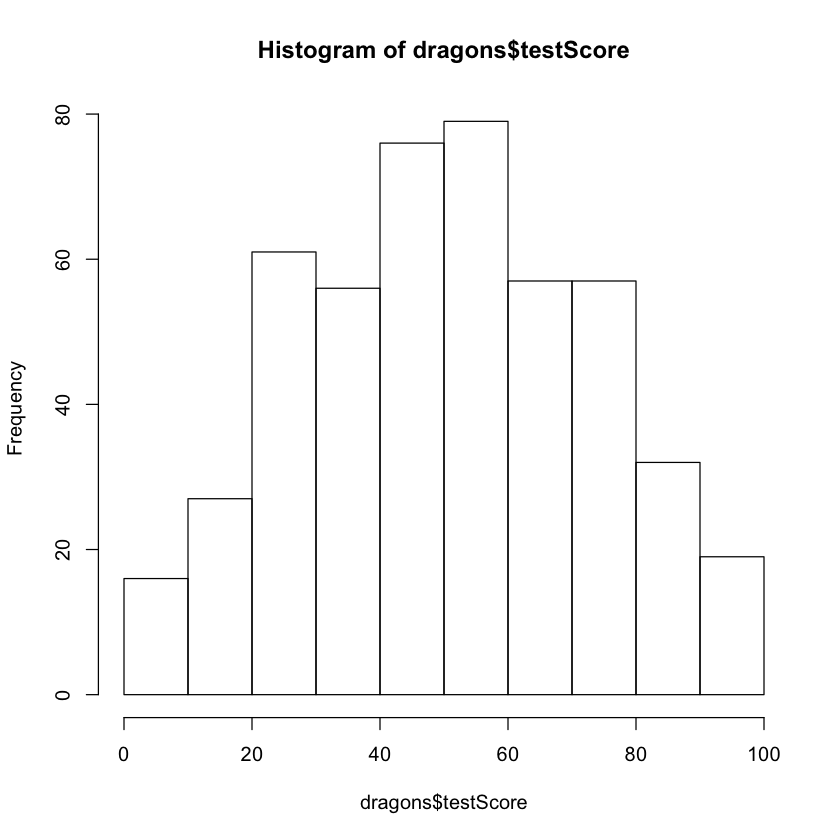

In [4]:
## Let's say we want to know how the body length affects test scores.

## Have a look at the data distribution:

hist(dragons$testScore)  # seems close to normal distribution - good!

In [15]:
## It is good practice to  standardise your explanatory variables before proceeding - you can use scale() to do that:

dragons$bodyLength2 <- scale(dragons$bodyLength)

In [34]:
## Back to our question: is test score affected by body length?

###---- Fit all data in one analysis -----###

## One way to analyse this data would be to try fitting a linear model to all our data, ignoring the sites and the mountain ranges for now.

model.lm1 <- lm(testScore ~ bodyLength2, data = dragons)

summary(model.lm1)



Call:
lm(formula = testScore ~ bodyLength2, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.962 -16.411  -0.783  15.193  55.200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.3860     0.9676  52.072   <2e-16 ***
bodyLength2   8.9956     0.9686   9.287   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.2 on 478 degrees of freedom
Multiple R-squared:  0.1529,	Adjusted R-squared:  0.1511 
F-statistic: 86.25 on 1 and 478 DF,  p-value: < 2.2e-16


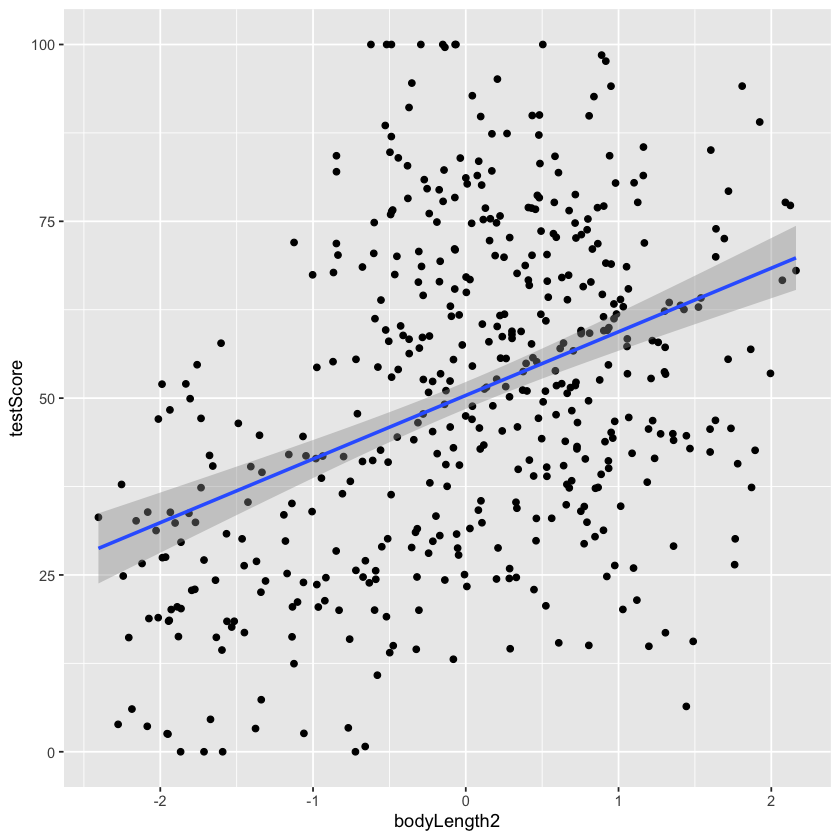

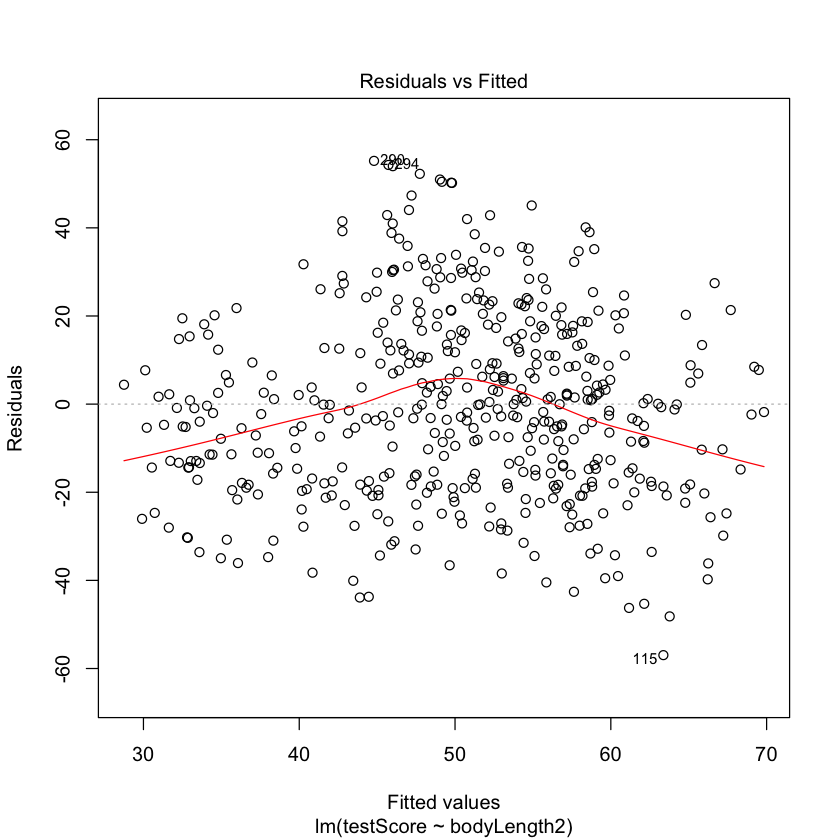

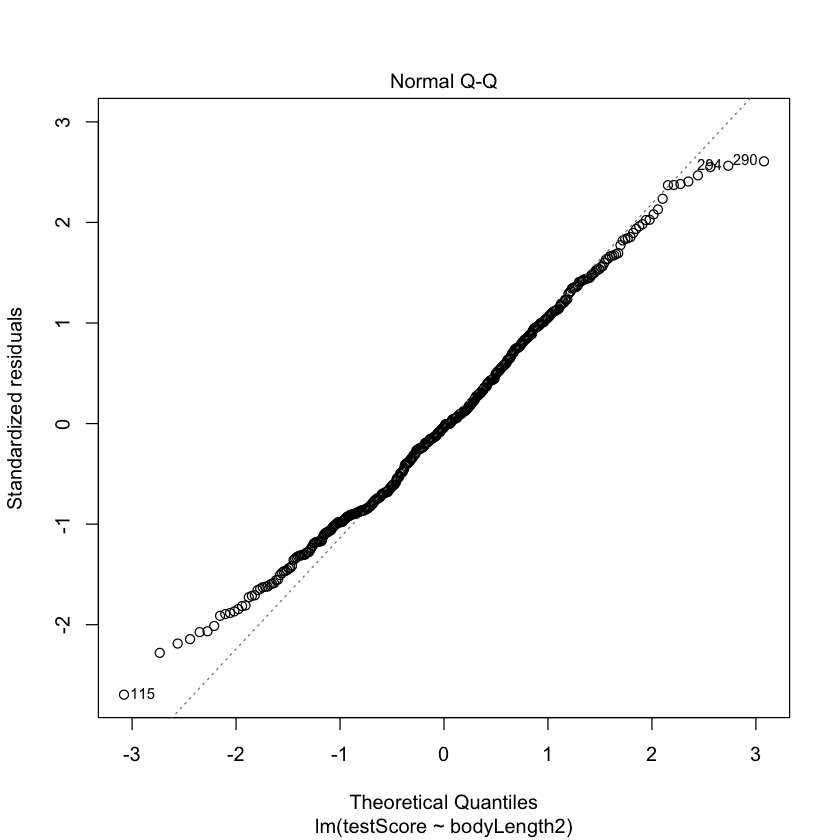

In [32]:
## Let's plot the data with ggplot2

library(ggplot2)

ggplot(dragons, aes(x = bodyLength2, y = testScore)) +
  geom_point()+
  geom_smooth(method = "lm")


### Assumptions?

## Plot the residuals - the red line should be close to being flat, like the dashed grey line

plot(basic.lm, which = 1)  # not perfect, but look alright

## Have a quick look at the  qqplot too - point should ideally fall onto the diagonal dashed line

plot(basic.lm, which = 2)  # a bit off at the extremes, but that's often the case; again doesn't look too bad

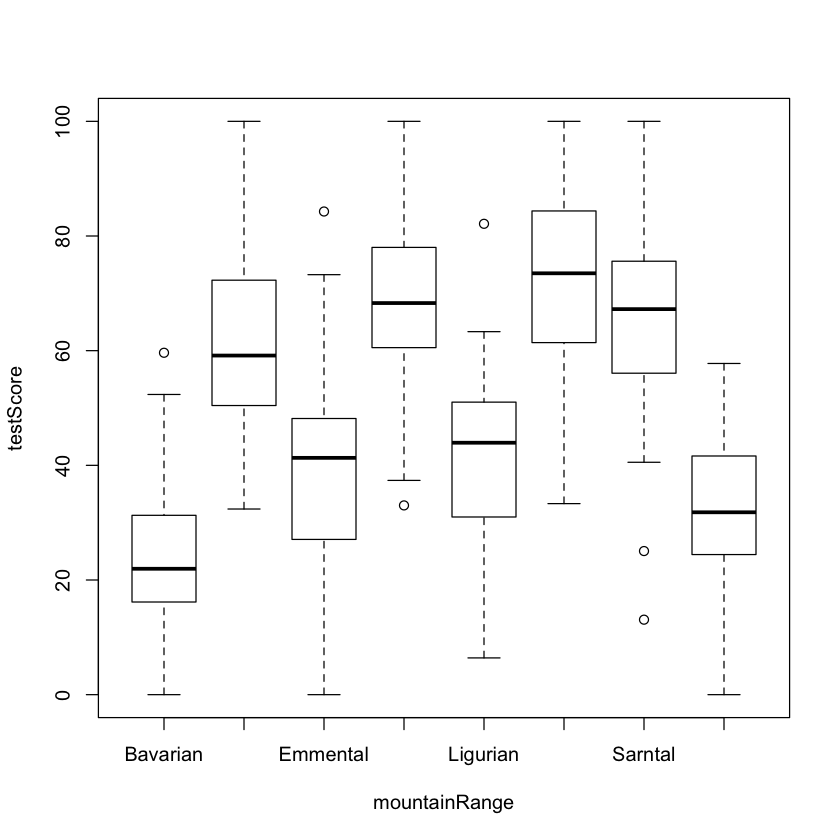

In [6]:
## However, what about observation independence? Are our data independent?
## We collected multiple samples from eight mountain ranges
## It's perfectly plausible that the data from within each mountain range are more similar to each other than the data from different mountain ranges - they are correlated. Pseudoreplication isn't our friend.

## Have a look at the data to see if above is true
boxplot(testScore ~ mountainRange, data = dragons)  # certainly looks like something is going on here

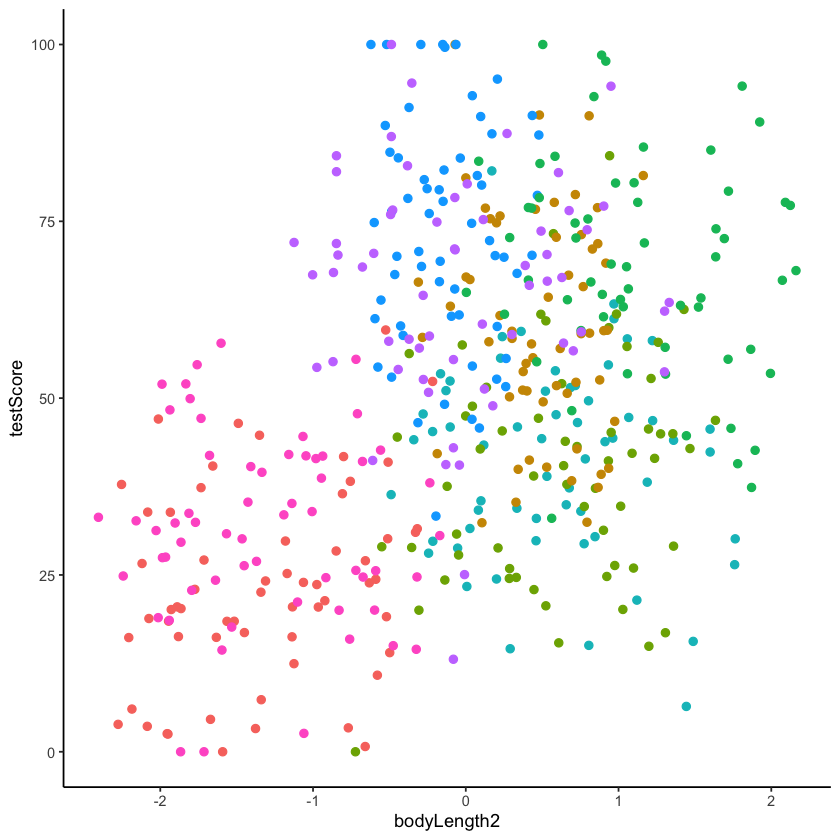

In [33]:
## We could also plot it colouring points by mountain range
ggplot(dragons, aes(x = bodyLength2, y = testScore, colour = mountainRange))+
  geom_point(size = 2)+
  theme_classic()+
    theme(legend.position = "none")

## From the plots it looks like our mountain ranges vary both in the dragon body length 
# and in their test scores. 
#This confirms that our observations from within each of the ranges aren't independent. 
##We can't ignore that.

## So what do we do?

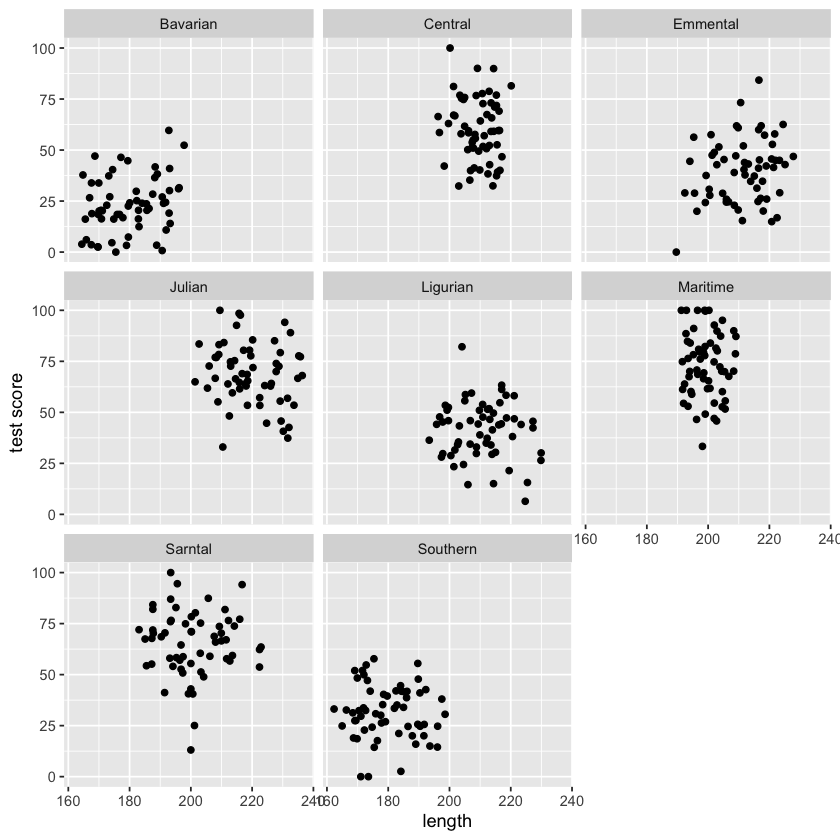

In [8]:
## OPTION #1
## We could run many separate analyses and fit a regression for each of the mountain ranges.

## Lets have a quick look at the data split by mountain range
## We use the facet_wrap to do that

ggplot(aes(bodyLength, testScore), data = dragons) + geom_point() +
    facet_wrap(~ mountainRange) +
    xlab("length") + ylab("test score")

In [35]:
## We want to use all the data, but account for the data coming from different mountain ranges

## let's add mountain range as a fixed effect to our basic linear model

model.lm2 <- lm(testScore ~ bodyLength2 + mountainRange, data = dragons)
summary(model.lm2)

## RESULT : now body length is not significant!

## But let’s think about what we are doing here for a second. 
## The above model is estimating the difference in test scores between the mountain ranges - 
## we can see all of them in the model output returned by summary(). 
## But we are not interested in quantifying test scores for each specific mountain range: 
## we just want to know whether body length affects test scores and we want 
## to simply control for the variation coming from mountain ranges.


Call:
lm(formula = testScore ~ bodyLength2 + mountainRange, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.263  -9.926   0.361   9.994  44.488 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.3818     2.5792   9.065  < 2e-16 ***
bodyLength2             0.2055     1.2927   0.159  0.87379    
mountainRangeCentral   36.5828     3.5993  10.164  < 2e-16 ***
mountainRangeEmmental  16.2092     3.6966   4.385 1.43e-05 ***
mountainRangeJulian    45.1147     4.1901  10.767  < 2e-16 ***
mountainRangeLigurian  17.7478     3.6736   4.831 1.84e-06 ***
mountainRangeMaritime  49.8813     3.1392  15.890  < 2e-16 ***
mountainRangeSarntal   41.9784     3.1972  13.130  < 2e-16 ***
mountainRangeSouthern   8.5196     2.7313   3.119  0.00192 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.96 on 471 degrees of freedom
Multiple R-squared:  0.5843,	Adjusted R-squared:  0.5773 
F

In [36]:
model.lm3 <- lm(testScore ~ bodyLength2 + site, data = dragons)
summary(model.lm3)


Call:
lm(formula = testScore ~ bodyLength2 + site, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.937 -16.205  -0.713  14.553  57.477 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   52.587      1.736  30.289   <2e-16 ***
bodyLength2    9.602      1.038   9.246   <2e-16 ***
siteb         -2.501      2.411  -1.037    0.300    
sitec         -4.101      2.541  -1.614    0.107    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.19 on 476 degrees of freedom
Multiple R-squared:  0.1576,	Adjusted R-squared:  0.1522 
F-statistic: 29.67 on 3 and 476 DF,  p-value: < 2.2e-16


In [37]:
## Create New Variable : sample
############# Aside: Correction for Implicit vs explicit nesting

dragons <- within(dragons, sample <- factor(mountainRange:site))

############

In [38]:
model.lm3 <- lm(testScore ~ bodyLength2 + sample, data = dragons)
summary(model.lm3)


Call:
lm(formula = testScore ~ bodyLength2 + sample, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.611 -10.154  -0.300   9.559  40.708 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       20.4861     5.3921   3.799 0.000165 ***
bodyLength2        0.3092     2.2419   0.138 0.890355    
sampleBavarian:b  -0.5708     4.7238  -0.121 0.903874    
sampleBavarian:c   9.6696     5.3891   1.794 0.073429 .  
sampleCentral:a   29.8699     7.1499   4.178 3.53e-05 ***
sampleCentral:b   40.4024     7.2642   5.562 4.56e-08 ***
sampleCentral:c   48.0102     6.8519   7.007 8.83e-12 ***
sampleEmmental:a  14.6783     6.2174   2.361 0.018653 *  
sampleEmmental:b  22.7872     7.4220   3.070 0.002267 ** 
sampleEmmental:c  19.6610     8.3189   2.363 0.018527 *  
sampleJulian:a    50.5251     7.1855   7.031 7.53e-12 ***
sampleJulian:b    50.5110     8.2067   6.155 1.65e-09 ***
sampleJulian:c    42.6415     9.4101   4.531 7.50e-06 ***
sampleLig

In [ ]:
# Option 2: 
#Mixed effects models
# https://ourcodingclub.github.io/2017/03/15/mixed-models.html


## A mixed effect aka multilevel model is a good choice here: 
## it will allow us to use all the data we have (higher sample size) *and* 
## account for the correlations between data coming from the sites and mountain ranges. 
## We will also estimate fewer parameters and avoid problems with multiple comparisons
## that we would encounter while using separate regressions.

In [46]:
#Let’s fit our first mixed model
# Alright! Still with me? We have a response variable, the test score and we are attempting to explain
# part of the variation in test score through fitting body length as a fixed effect. 
# But the response variable has some residual variation (i.e. unexplained variation) 
# associated with mountain ranges. By using random effects, we are modeling 
# that unexplained variation through variance.


## Note that our question changes slightly here: 
#while we still want to know whether there is an association between dragon’s body length 
#and the test score, we want to know if that association exists after controlling 
# for the variation in mountain ranges.

#lmer is from the lme4 package (Linear Mixed Effects Regression)
library(lme4)
mixed.lmer1.0 <- lmer(testScore ~ bodyLength2 + (1|mountainRange), data = dragons)
summary(mixed.lmer1.0)


### NOTE THE SYNTAX CHANGE ABOVE!!! 
# LINEAR REGRESSION:     basic.lm <- lm(testScore ~ bodyLength2, data = dragons)
# MIXED EFFECTS MODEL:   mixed.lmer <- lmer(testScore ~ bodyLength2 + (1|mountainRange), data = dragons)

# The notational similarity is NOT AN ACCIDENT!!!!!

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | mountainRange)
   Data: dragons

REML criterion at convergence: 3985.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4815 -0.6513  0.0066  0.6685  2.9583 

Random effects:
 Groups        Name        Variance Std.Dev.
 mountainRange (Intercept) 339.7    18.43   
 Residual                  223.8    14.96   
Number of obs: 480, groups:  mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)  50.3860     6.5517   7.690
bodyLength2   0.5377     1.2750   0.422

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 

In [ ]:
# Also, Keep in mind that the random effect of the mountain range is meant to capture 
# all the influences of mountain ranges on dragon test scores - 
# whether we observed those influences explicitly or not, 
# whether those influences are big or small etc. 
# It could be many, many teeny-tiny influences that, when combined, 
# affect the test scores and that’s what we are hoping to control for.

# We can see the variance for mountainRange = 339.7. 
# Mountain ranges are clearly important: they explain a lot of variation. 
# How do we know that? 
# We can take the variance for the mountainRange and divide it by the total variance:

339.7/(339.7 + 223.8)  # ~60 %

# So the differences between mountain ranges explain ~60% of the variance 
#that’s “left over” after the variance explained by our fixed effects.

In [29]:
mixed.lmer1.1 <- lmer(testScore ~ bodyLength2 + (1|site), data = dragons)
summary(mixed.lmer1.1)

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | site)
   Data: dragons

REML criterion at convergence: 4288.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.67877 -0.76883 -0.02729  0.71784  2.62704 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept)   0.827   0.9094 
 Residual             448.913  21.1876 
Number of obs: 480, groups:  site, 3

Fixed effects:
            Estimate Std. Error t value
(Intercept)  50.3860     1.1004  45.788
bodyLength2   9.1192     0.9829   9.278

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 

In [30]:
mixed.lmer1.2 <- lmer(testScore ~ bodyLength2 + (1|sample), data = dragons)
summary(mixed.lmer1.2)

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | sample)
   Data: dragons

REML criterion at convergence: 3998.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.06628 -0.66987 -0.02465  0.67329  2.74792 

Random effects:
 Groups   Name        Variance Std.Dev.
 sample   (Intercept) 292.4    17.10   
 Residual             209.2    14.46   
Number of obs: 480, groups:  sample, 24

Fixed effects:
            Estimate Std. Error t value
(Intercept)   50.386      3.552  14.185
bodyLength2    2.847      1.922   1.481

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 

In [ ]:
mixed.lmer1.0 <- lmer(testScore ~ bodyLength2 + (1|mountainRange), data = dragons)
summary(mixed.lmer1.0)

In [44]:
mixed.lmer1.1 <- lmer(testScore ~ bodyLength2 + (1|mountainRange) + (1|sample), data = dragons)
summary(mixed.lmer1.1)

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | mountainRange) + (1 | sample)
   Data: dragons

REML criterion at convergence: 3970.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2425 -0.6752 -0.0117  0.6974  2.8812 

Random effects:
 Groups        Name        Variance Std.Dev.
 sample        (Intercept)  23.09    4.805  
 mountainRange (Intercept) 327.56   18.099  
 Residual                  208.58   14.442  
Number of obs: 480, groups:  sample, 24; mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)   50.386      6.507   7.743
bodyLength2    0.831      1.681   0.494

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 

In [39]:
mixed.lmer2.0 <- lmer(testScore ~ bodyLength2 + (1+bodyLength2|mountainRange), data = dragons)
summary(mixed.lmer2.0)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 + bodyLength2 | mountainRange)
   Data: dragons

REML criterion at convergence: 3980.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5004 -0.6683  0.0207  0.6592  2.9449 

Random effects:
 Groups        Name        Variance Std.Dev. Corr 
 mountainRange (Intercept) 324.156  18.004        
               bodyLength2   9.907   3.148   -1.00
 Residual                  221.577  14.885        
Number of obs: 480, groups:  mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept) 51.75306    6.40402   8.081
bodyLength2 -0.03331    1.68325  -0.020

Correlation of Fixed Effects:
            (Intr)
bodyLength2 -0.674
convergence code: 0
boundary (singular) fit: see ?isSingular


In [ ]:
mixed.lmer1.1 <- lmer(testScore ~ bodyLength2 + (1|site), data = dragons)
summary(mixed.lmer1.1)

In [40]:
mixed.lmer2.1 <- lmer(testScore ~ bodyLength2 + (1+bodyLength2|site), data = dragons)
summary(mixed.lmer1.1)

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | site)
   Data: dragons

REML criterion at convergence: 4288.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.67877 -0.76883 -0.02729  0.71784  2.62704 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept)   0.827   0.9094 
 Residual             448.913  21.1876 
Number of obs: 480, groups:  site, 3

Fixed effects:
            Estimate Std. Error t value
(Intercept)  50.3860     1.1004  45.788
bodyLength2   9.1192     0.9829   9.278

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 

In [42]:
mixed.lmer3.1 <- lmer(testScore ~ bodyLength2 + (1+bodyLength2|mountainRange/site), data = dragons)
summary(mixed.lmer3.1)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 + bodyLength2 | mountainRange/site)
   Data: dragons

REML criterion at convergence: 3968.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2653 -0.6737 -0.0200  0.6931  2.8432 

Random effects:
 Groups             Name        Variance Std.Dev. Corr 
 site:mountainRange (Intercept)  19.8243  4.4524       
                    bodyLength2   0.7195  0.8482  1.00 
 mountainRange      (Intercept) 310.9736 17.6344       
                    bodyLength2   6.1176  2.4734  -1.00
 Residual                       208.5003 14.4395       
Number of obs: 480, groups:  site:mountainRange, 24; mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)  51.4267     6.3409   8.110
bodyLength2   0.6692     1.8732   0.357

Correlation of Fixed Effects:
            (Intr)
bodyLength2 -0.461
convergence code: 0
boundary (singular) fit: see ?isSingular


In [46]:
mixed.lmer3.2 <- lmer(testScore ~ bodyLength2 + (1+bodyLength2|mountainRange/sample), data = dragons)
summary(mixed.lmer3.2)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 + bodyLength2 | mountainRange/sample)
   Data: dragons

REML criterion at convergence: 3968.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2653 -0.6737 -0.0200  0.6931  2.8432 

Random effects:
 Groups               Name        Variance Std.Dev. Corr 
 sample:mountainRange (Intercept)  19.8243  4.4524       
                      bodyLength2   0.7195  0.8482  1.00 
 mountainRange        (Intercept) 310.9736 17.6344       
                      bodyLength2   6.1176  2.4734  -1.00
 Residual                         208.5003 14.4395       
Number of obs: 480, groups:  sample:mountainRange, 24; mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)  51.4267     6.3409   8.110
bodyLength2   0.6692     1.8732   0.357

Correlation of Fixed Effects:
            (Intr)
bodyLength2 -0.461
convergence code: 0
boundary (singular) fit: see ?isSingular


In [47]:
mixed.lmer3.3 <- lmer(testScore ~ bodyLength2 + (1+bodyLength2|site/sample), data = dragons)
summary(mixed.lmer3.3)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 + bodyLength2 | site/sample)
   Data: dragons

REML criterion at convergence: 3997.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.07050 -0.65960 -0.03363  0.67936  2.73359 

Random effects:
 Groups      Name        Variance  Std.Dev.  Corr 
 sample:site (Intercept) 2.826e+02 16.812127      
             bodyLength2 3.277e+00  1.810345 -1.00
 site        (Intercept) 1.388e-05  0.003726      
             bodyLength2 1.352e-06  0.001163 1.00 
 Residual                2.092e+02 14.464952      
Number of obs: 480, groups:  sample:site, 24; site, 3

Fixed effects:
            Estimate Std. Error t value
(Intercept)   51.001      3.500  14.573
bodyLength2    2.504      1.947   1.286

Correlation of Fixed Effects:
            (Intr)
bodyLength2 -0.235
convergence code: 0
boundary (singular) fit: see ?isSingular


In [ ]:
# NOTE: For the record, you could also use the below syntax, 
# and you will often come across it if you read more about mixed models:

# (1|mountainRange/site) or even (1|mountainRange) + (1|mountainRange:site)

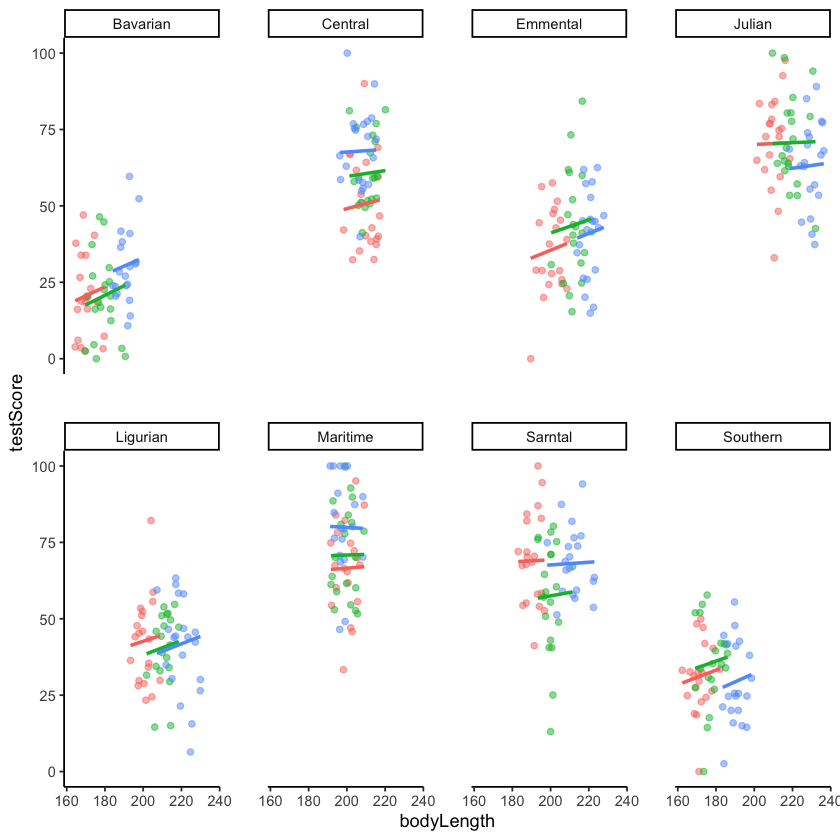

In [49]:
# let's plot it!!

(mm_plot <- ggplot(dragons, aes(x = bodyLength, y = testScore, colour = site)) +
      facet_wrap(~mountainRange, nrow=2) +   # a panel for each mountain range
      geom_point(alpha = 0.5) +
      theme_classic() +
      geom_line(data = cbind(dragons, pred = predict(mixed.lmer3.3)), aes(y = pred), size = 1) +  # adding predicted line from mixed model 
      theme(legend.position = "none",
            panel.spacing = unit(2, "lines"))  # adding space between panels
)


The downloaded binary packages are in
	/var/folders/tw/j1fhz1vs0hvbqkyjb47bdgc80000gn/T//RtmpvaqMr9/downloaded_packages


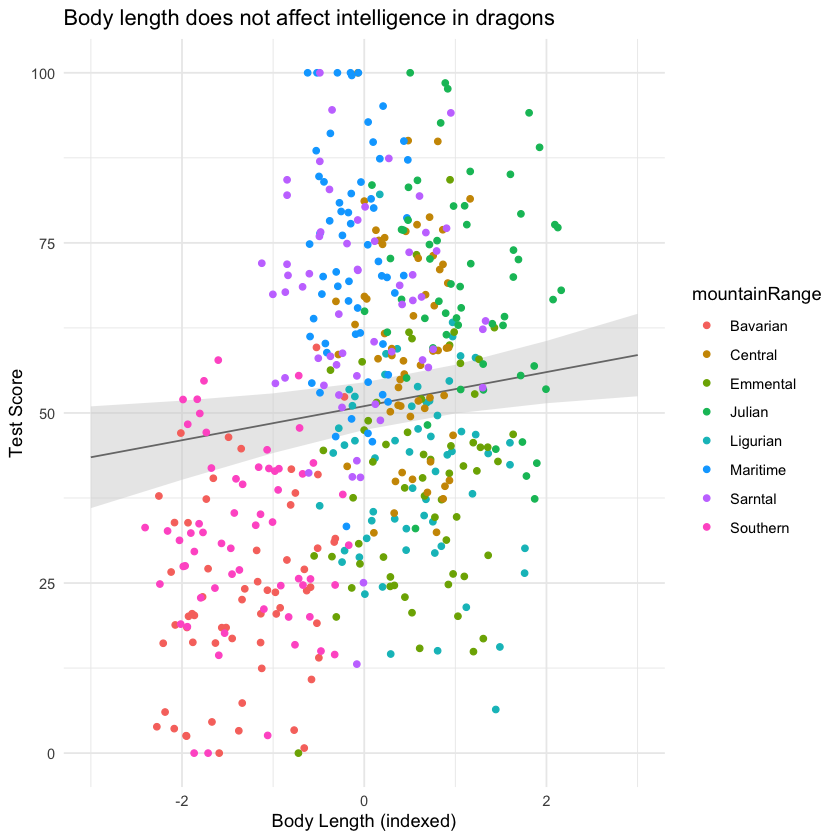

In [50]:
install.packages('ggeffects')
library(ggeffects)  # install the package first if you haven't already, then load it

# Extract the prediction data frame
pred.mm <- ggpredict(mixed.lmer3.3, terms = c("bodyLength2"))  # this gives overall predictions for the model

# Plot the predictions 

(ggplot(pred.mm) + 
   geom_line(aes(x = x, y = predicted)) +          # slope
   geom_ribbon(aes(x = x, ymin = predicted - std.error, ymax = predicted + std.error), 
               fill = "lightgrey", alpha = 0.5) +  # error band
   geom_point(data = dragons,                      # adding the raw data (scaled values)
              aes(x = bodyLength2, y = testScore, colour = mountainRange)) + 
   labs(x = "Body Length (indexed)", y = "Test Score", 
        title = "Body length does not affect intelligence in dragons") + 
   theme_minimal()
)

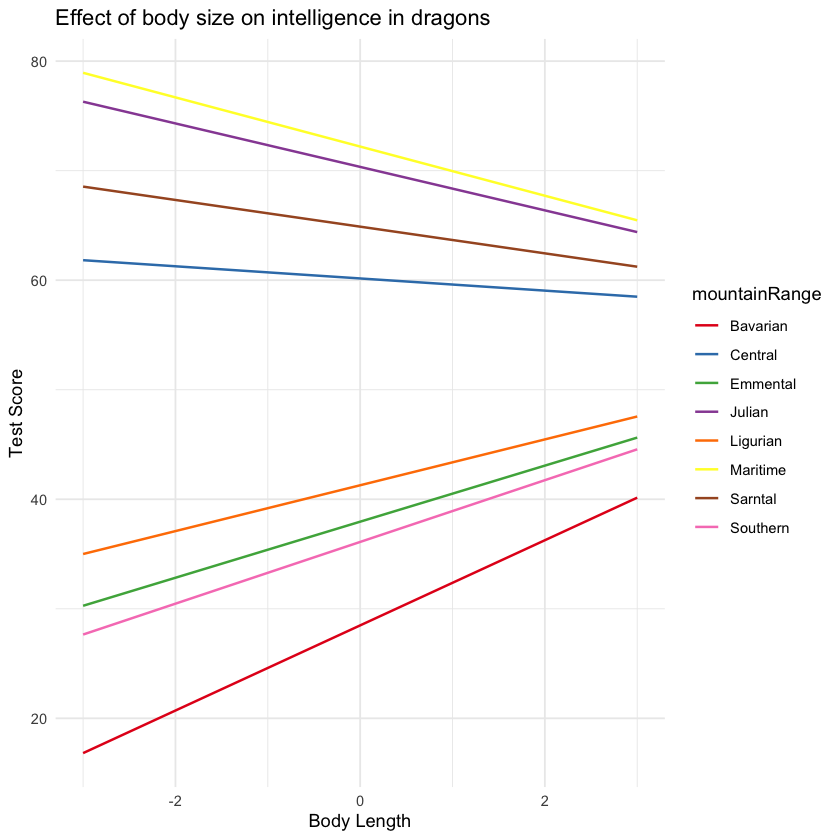

In [52]:
#mixed.lmer3.2 <- lmer(testScore ~ bodyLength2 + (1+bodyLength2|mountainRange/sample), data = dragons)
ggpredict(mixed.lmer3.2, terms = c("bodyLength2", "mountainRange"), type = "re") %>% 
   plot() +
   labs(x = "Body Length", y = "Test Score", title = "Effect of body size on intelligence in dragons") + 
   theme_minimal()

In [ ]:
####### Bayesian Models ####

In [29]:
str(dragons)

'data.frame':	480 obs. of  6 variables:
 $ testScore    : num  16.15 33.89 6.04 18.84 33.86 ...
 $ bodyLength   : num  166 168 166 168 170 ...
 $ mountainRange: Factor w/ 8 levels "Bavarian","Central",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ X            : logi  NA NA NA NA NA NA ...
 $ site         : Factor w/ 3 levels "a","b","c": 1 1 1 1 1 1 1 1 1 1 ...
 $ bodyLength2  : num [1:480, 1] -2.21 -2.08 -2.19 -2.07 -1.93 ...
  ..- attr(*, "scaled:center")= num 201
  ..- attr(*, "scaled:scale")= num 16.2


In [55]:
library(rethinking)
rstan_options(auto_write = TRUE)

Loading required package: rstan

Loading required package: StanHeaders

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: parallel

rethinking (Version 1.60)



In [59]:
lmm1 <- map2stan(
            alist(
                testScore ~ dnorm(mu, sigma),
                mu ~ a0 + a1*bodyLength2,
                a0 ~ dnorm(50,10),
                a1 ~ dnorm(10,10),
                sigma ~ dunif(10,30)
            ),
            data=dragons,
            chains=1, iter=5000, warmup=1000)
precis(lmm1)

Warning message in map2stan(alist(testScore ~ dnorm(mu, sigma), mu ~ a0 + a1 * bodyLength2, :
“Stripping scale attributes from variable bodyLength2”
recompiling to avoid crashing R session




SAMPLING FOR MODEL 'testScore ~ dnorm(mu, sigma)' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1: Iteration:  500 / 5000 [ 10%]  (Warmup)
Chain 1: Iteration: 1000 / 5000 [ 20%]  (Warmup)
Chain 1: Iteration: 1001 / 5000 [ 20%]  (Sampling)
Chain 1: Iteration: 1500 / 5000 [ 30%]  (Sampling)
Chain 1: Iteration: 2000 / 5000 [ 40%]  (Sampling)
Chain 1: Iteration: 2500 / 5000 [ 50%]  (Sampling)
Chain 1: Iteration: 3000 / 5000 [ 60%]  (Sampling)
Chain 1: Iteration: 3500 / 5000 [ 70%]  (Sampling)
Chain 1: Iteration: 4000 / 5000 [ 80%]  (Sampling)
Chain 1: Iteration: 4500 / 5000 [ 90%]  (Sampling)
Chain 1: Iteration: 5000 / 5000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.151216 seconds (Warm-up)
Chain 1:                0.466461 seconds (Sampling

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”
Computing WAIC

Constructing posterior predictions



Error in fit@formula_parsed$vprior[[i]] : subscript out of bounds


       Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
a0    50.40   0.95      48.77      51.80  4172    1
a1     8.99   0.96       7.45      10.51  4651    1
sigma 21.26   0.68      20.18      22.37  5288    1

In [37]:
#RECALL our first linear regression. The coefficients match!!!

basic.lm <- lm(testScore ~ bodyLength2, data = dragons)

summary(basic.lm)


Call:
lm(formula = testScore ~ bodyLength2, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.962 -16.411  -0.783  15.193  55.200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.3860     0.9676  52.072   <2e-16 ***
bodyLength2   8.9956     0.9686   9.287   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.2 on 478 degrees of freedom
Multiple R-squared:  0.1529,	Adjusted R-squared:  0.1511 
F-statistic: 86.25 on 1 and 478 DF,  p-value: < 2.2e-16


In [63]:
dragons$mountainRange_id <- coerce_index(dragons$mountainRange)

In [68]:
lmm2 <- map2stan(
            alist(
                testScore ~ dnorm(mu, sigma),
                mu ~ a[mountainRange_id] + bBL2*bodyLength2,
                a[mountainRange_id] ~ dnorm(25,25),
                bBL2 ~ dnorm(10,10),
                sigma ~ dunif(0,30)
            ),
            data=dragons,
            chains=2, iter=4000, warmup=500)
precis(lmm2, depth=2)

Warning message in map2stan(alist(testScore ~ dnorm(mu, sigma), mu ~ a[mountainRange_id] + :
“Stripping scale attributes from variable bodyLength2”
recompiling to avoid crashing R session




SAMPLING FOR MODEL 'testScore ~ dnorm(mu, sigma)' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  501 / 4000 [ 12%]  (Sampling)
Chain 1: Iteration:  900 / 4000 [ 22%]  (Sampling)
Chain 1: Iteration: 1300 / 4000 [ 32%]  (Sampling)
Chain 1: Iteration: 1700 / 4000 [ 42%]  (Sampling)
Chain 1: Iteration: 2100 / 4000 [ 52%]  (Sampling)
Chain 1: Iteration: 2500 / 4000 [ 62%]  (Sampling)
Chain 1: Iteration: 2900 / 4000 [ 72%]  (Sampling)
Chain 1: Iteration: 3300 / 4000 [ 82%]  (Sampling)
Chain 1: Iteration: 3700 / 4000 [ 92%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.416204 seconds (Warm-up)
Chain 1:                0.802582 seconds (Sampli

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”
Computing WAIC

Constructing posterior predictions



[ 7000 / 7000 ]


       Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
a[1]  23.91   2.58      19.70      27.89  5071    1
a[2]  59.58   2.06      56.38      63.01  8435    1
a[3]  39.29   2.13      35.92      42.63  8298    1
a[4]  67.81   2.42      63.76      71.48  5149    1
a[5]  40.80   2.09      37.75      44.41  8614    1
a[6]  73.01   1.98      69.96      76.22 10584    1
a[7]  65.15   1.90      62.23      68.19 12697    1
a[8]  32.34   2.53      28.55      36.68  4886    1
bBL2   0.56   1.30      -1.51       2.62  3495    1
sigma 15.00   0.50      14.22      15.81  9566    1

In [60]:
#recall model.lm2! coefficients are similar although bodylength factor is different (not significant for the linear model)
model.lm2 <- lm(testScore ~ bodyLength2 + mountainRange, data = dragons)
summary(model.lm2)


Call:
lm(formula = testScore ~ bodyLength2 + mountainRange, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.263  -9.926   0.361   9.994  44.488 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.3818     2.5792   9.065  < 2e-16 ***
bodyLength2             0.2055     1.2927   0.159  0.87379    
mountainRangeCentral   36.5828     3.5993  10.164  < 2e-16 ***
mountainRangeEmmental  16.2092     3.6966   4.385 1.43e-05 ***
mountainRangeJulian    45.1147     4.1901  10.767  < 2e-16 ***
mountainRangeLigurian  17.7478     3.6736   4.831 1.84e-06 ***
mountainRangeMaritime  49.8813     3.1392  15.890  < 2e-16 ***
mountainRangeSarntal   41.9784     3.1972  13.130  < 2e-16 ***
mountainRangeSouthern   8.5196     2.7313   3.119  0.00192 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.96 on 471 degrees of freedom
Multiple R-squared:  0.5843,	Adjusted R-squared:  0.5773 
F

In [61]:
#model.lm3
model.lm3 <- lm(testScore ~ bodyLength2 + site, data = dragons)
summary(model.lm3)


Call:
lm(formula = testScore ~ bodyLength2 + site, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.937 -16.205  -0.713  14.553  57.477 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   52.587      1.736  30.289   <2e-16 ***
bodyLength2    9.602      1.038   9.246   <2e-16 ***
siteb         -2.501      2.411  -1.037    0.300    
sitec         -4.101      2.541  -1.614    0.107    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.19 on 476 degrees of freedom
Multiple R-squared:  0.1576,	Adjusted R-squared:  0.1522 
F-statistic: 29.67 on 3 and 476 DF,  p-value: < 2.2e-16


In [70]:

mixed.lmer <- lmer(testScore ~ bodyLength2 + (1|mountainRange), data = dragons)
summary(mixed.lmer)

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | mountainRange)
   Data: dragons

REML criterion at convergence: 3985.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4815 -0.6513  0.0066  0.6685  2.9583 

Random effects:
 Groups        Name        Variance Std.Dev.
 mountainRange (Intercept) 339.7    18.43   
 Residual                  223.8    14.96   
Number of obs: 480, groups:  mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)  50.3860     6.5517   7.690
bodyLength2   0.5377     1.2750   0.422

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 

In [74]:
lmm3 <- map2stan(
            alist(
                testScore ~ dnorm(mu, sigma),
                mu ~ MR[mountainRange_id] + bBL2*bodyLength2,
                bBL2 ~ dnorm(2,10),
                MR[mountainRange_id] ~ dnorm(40,sigma_mountain),
                sigma_mountain ~ dunif(10,40),
                sigma ~ dunif(10,40)
            ),
            data=dragons,
            chains=2, iter=10000, warmup=1000)
precis(lmm3, depth=2)

Warning message in map2stan(alist(testScore ~ dnorm(mu, sigma), mu ~ MR[mountainRange_id] + :
“Stripping scale attributes from variable bodyLength2”
recompiling to avoid crashing R session




SAMPLING FOR MODEL 'testScore ~ dnorm(mu, sigma)' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 1001 / 10000 [ 10%]  (Sampling)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Sampling)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.397737 seconds (Warm-up)
Chain 1:                3.20991 sec

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”
Computing WAIC

Constructing posterior predictions



[ 18000 / 18000 ]


                Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
bBL2            0.44   1.28      -1.48       2.59  9141    1
MR[1]          23.83   2.57      19.80      27.96 10946    1
MR[2]          59.73   2.05      56.45      63.06 17171    1
MR[3]          39.45   2.06      36.09      42.65 17040    1
MR[4]          68.00   2.41      64.10      71.76 12598    1
MR[5]          40.97   2.06      37.77      44.38 16429    1
MR[6]          73.01   1.94      69.87      76.07 18978    1
MR[7]          65.16   1.92      62.11      68.24 18500    1
MR[8]          32.27   2.57      28.26      36.42 12294    1
sigma_mountain 23.84   6.81      13.29      33.10  7349    1
sigma          15.00   0.49      14.18      15.74 18582    1

In [41]:
mixed.lmer <- lmer(testScore ~ bodyLength2 + (1|mountainRange), data = dragons)
summary(mixed.lmer)

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | mountainRange)
   Data: dragons

REML criterion at convergence: 3985.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4815 -0.6513  0.0066  0.6685  2.9583 

Random effects:
 Groups        Name        Variance Std.Dev.
 mountainRange (Intercept) 339.7    18.43   
 Residual                  223.8    14.96   
Number of obs: 480, groups:  mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)  50.3860     6.5517   7.690
bodyLength2   0.5377     1.2750   0.422

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 

In [77]:
dragons$sample_id <- coerce_index(dragons$sample)

In [81]:
lmm4 <- map2stan(
            alist(
                testScore ~ dnorm(mu, sigma),
                mu ~ S[sample_id] + bBL2*bodyLength2,
                bBL2 ~ dnorm(2,10),
                S[sample_id] ~ dnorm(50,sigma_sample),
                sigma_sample ~ dunif(10,30),
                sigma ~ dunif(10,30)
            ),
            data=dragons,
            chains=2, iter=6000, warmup=1000)
precis(lmm4, depth=2)

Warning message in map2stan(alist(testScore ~ dnorm(mu, sigma), mu ~ S[sample_id] + :
“Stripping scale attributes from variable bodyLength2”
recompiling to avoid crashing R session




SAMPLING FOR MODEL 'testScore ~ dnorm(mu, sigma)' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.63 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 6000 [  0%]  (Warmup)
Chain 1: Iteration:  600 / 6000 [ 10%]  (Warmup)
Chain 1: Iteration: 1001 / 6000 [ 16%]  (Sampling)
Chain 1: Iteration: 1600 / 6000 [ 26%]  (Sampling)
Chain 1: Iteration: 2200 / 6000 [ 36%]  (Sampling)
Chain 1: Iteration: 2800 / 6000 [ 46%]  (Sampling)
Chain 1: Iteration: 3400 / 6000 [ 56%]  (Sampling)
Chain 1: Iteration: 4000 / 6000 [ 66%]  (Sampling)
Chain 1: Iteration: 4600 / 6000 [ 76%]  (Sampling)
Chain 1: Iteration: 5200 / 6000 [ 86%]  (Sampling)
Chain 1: Iteration: 5800 / 6000 [ 96%]  (Sampling)
Chain 1: Iteration: 6000 / 6000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.560661 seconds (Warm-up)
Chain 1:                2.13641 seconds (Samplin

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”
Computing WAIC

Constructing posterior predictions



[ 10000 / 10000 ]


              Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
bBL2          2.86   1.96      -0.24       5.98  3455    1
S[1]         26.27   4.89      18.40      34.00  4071    1
S[2]         24.43   4.24      17.41      31.00  5198    1
S[3]         32.45   3.47      27.07      38.17 10578    1
S[4]         49.02   3.33      43.78      54.29 11389    1
S[5]         59.02   3.40      53.71      64.63 10817    1
S[6]         66.95   3.29      61.87      72.27 14832    1
S[7]         35.82   3.16      30.83      40.88 17666    1
S[8]         41.79   3.49      36.40      47.50 11911    1
S[9]         37.62   3.87      31.46      43.75  6716    1
S[10]        68.98   3.36      63.55      74.21 10342    1
S[11]        67.49   3.90      61.02      73.44  6132    1
S[12]        58.36   4.55      51.46      65.86  4447    1
S[13]        42.87   3.19      37.63      47.81 17456    1
S[14]        39.02   3.39      33.72      44.45 11057    1
S[15]        37.99   3.86      31.89      44.17  7013   

In [83]:
#Linear Mixed Model #4 - Random Effect Only
mixed.lmer4 <- lmer(testScore ~ bodyLength2 + (1|sample), data = dragons) 
summary(mixed.lmer4)

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | sample)
   Data: dragons

REML criterion at convergence: 3998.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.06628 -0.66987 -0.02465  0.67329  2.74792 

Random effects:
 Groups   Name        Variance Std.Dev.
 sample   (Intercept) 292.4    17.10   
 Residual             209.2    14.46   
Number of obs: 480, groups:  sample, 24

Fixed effects:
            Estimate Std. Error t value
(Intercept)   50.386      3.552  14.185
bodyLength2    2.847      1.922   1.481

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 